# Customer Segmentation


The dataset for this project can be found on the UCI Machine Learning Repository. For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis with focus instead on the six product categories recorded for customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("Wholesale customers data.csv")
print(data)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...

In [3]:
data = data.drop(['Region', 'Channel'], axis = 1)
print(data)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]


In [4]:
x,y = data.shape
print("Dataset has ",x, "rows and ",y,"columns")

Dataset has  440 rows and  6 columns


Description of Categories
--------------------------------------
    FRESH: annual spending (m.u.) on fresh products (Continuous)
    
    MILK: annual spending (m.u.) on milk products (Continuous)
    
    GROCERY: annual spending (m.u.) on grocery products (Continuous)
    
    FROZEN: annual spending (m.u.)on frozen products (Continuous)
    
    DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    
    DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


#### Viewing above output we can conclude that there is no null value present in data

In [6]:
stats = data.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



## Implementation: Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below,I added three indices of my choice to the indices list which will represent the customers to track.


In [7]:
# Using data.loc to filter a pandas DataFrame
data.loc[[100, 200, 300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [8]:
# Retrieve column names
data.columns
# Alternative code:data.keys()


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

### Logic in selecting the 3 samples: Quartiles

As you can previously (in the object "stats"), we've the data showing the first and third quartiles.
We can filter samples that are starkly different based on the quartiles.


This way we've two establishments that belong in the first and third quartiles respectively in, for example, the Frozen category.



In [9]:
# Fresh filter
fresh_q1 = 3127.750000
print("number of rows:",data.loc[data.Fresh < fresh_q1, :].shape[0])
data.loc[data.Fresh < fresh_q1, :].head(8)

number of rows: 110


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72
46,3103,14069,21955,1668,6792,1452
53,491,10473,11532,744,5611,224
65,85,20959,45828,36,24231,1423


In [10]:
# Frozen filter
frozen_q1 = 742.250000
print("number of rows:",data.loc[data.Frozen < frozen_q1, :].shape[0])
display(data.loc[data.Frozen < frozen_q1, :].head(8))


number of rows: 110


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931
14,24653,9465,12091,294,5058,2168
15,10253,1114,3821,397,964,412
16,1020,8816,12121,134,4508,1080


In [11]:
# Frozen
frozen_q3 = 3554.250000
display(data.loc[data.Frozen > frozen_q3, :].head(8))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916
40,24025,4332,4757,9510,1145,5864




Hence we'll be choosing:

    43: Very low "Fresh" and very high "Grocery"
    
    12: Very low "Frozen" and very high "Fresh"
    
    39: Very high "Frozen" and very low "Detergens_Paper"



In [12]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [43, 12, 39]

# Create a DataFrame of the chosen samples
# .reset_index(drop = True) resets the index from 0, 1 and 2 instead of 100, 200 and 300 
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
samples


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


###  Comparison of Samples and Means


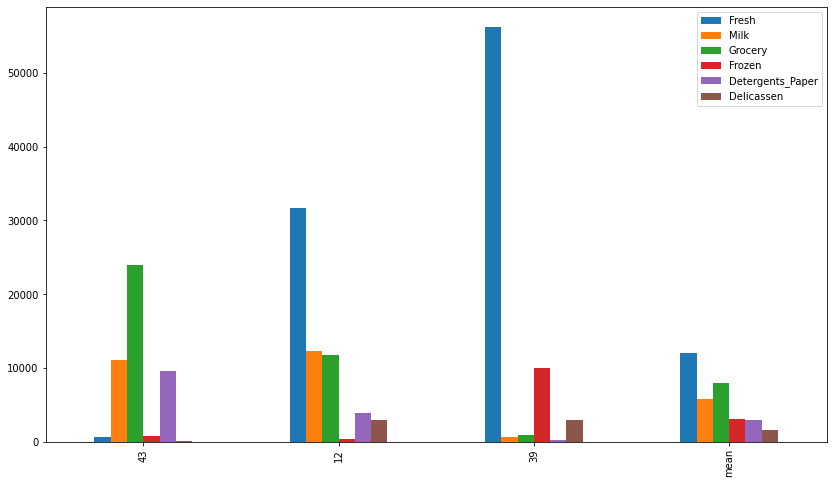

In [13]:
# Get the means 
mean_data = data.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))

### Comparing Samples' Percentiles

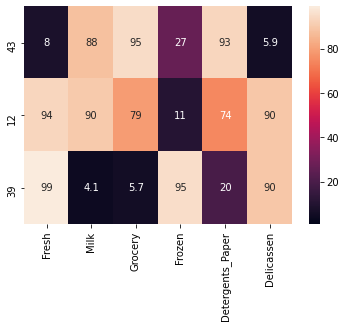

In [16]:
import seaborn as sns

# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)




## Implementation: Feature Relevance

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, we will need to implement the following:

    Assign new_data a copy of the data by removing a feature of your choice using the DataFrame.drop function.
    
    Use sklearn.cross_validation.train_test_split to split the dataset into training and testing sets.
    
    Use the removed feature as your target label. Set a test_size of 0.25 and set a random_state.
    
    Import a decision tree regressor, set a random_state, and fit the learner to the training data.
    
    Report the prediction score of the testing set using the regressor's score function.



In [18]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor



In [19]:
# Create list to loop through
dep_vars = list(data.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.38574971020407384
R2 score for Milk as dependent variable: 0.15627539501732116
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931
